In [8]:
import pandas as pd 
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white", color_codes=True)
%matplotlib inline

In [9]:
data = pd.read_csv('2014-15 B1G Data(hailey).csv')
data_2014_15 = data[data['Year'] == '2014-2015'].drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)
data_2015_16 = data[data['Year'] == '2015-2016'].drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)
data_2016_17 = data[data['Year'] == '2016-2017'].drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)
data_2017_18 = data[data['Year'] == '2017-2018'].drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)
data_2018_19 = data[data['Year'] == '2018-2019'].drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)
dataa = data.drop(['L', 'School', 'Year', 'MP', 'Seed', 'Finish', 'G'], 1)

In [10]:
ind_variables_2014_15 = [i for i in data_2014_15.columns if i != 'W'] 
ind_variables_2015_16 = [i for i in data_2015_16.columns if i != 'W']
ind_variables_2016_17 = [i for i in data_2016_17.columns if i != 'W']
ind_variables_2017_18 = [i for i in data_2017_18.columns if i != 'W']
ind_variables_2018_19 = [i for i in data_2018_19.columns if i != 'W']
total_var = [i for i in dataa.columns if i != 'W']

In [11]:
# test

y = 'W'
x = ind_variables_2014_15
model_simple = sm.OLS(data_2014_15['W'], data_2014_15[ind_variables_2014_15]).fit()

model = sm.OLS(data_2014_15[y], sm.add_constant(data_2014_15[ind_variables_2014_15])).fit()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


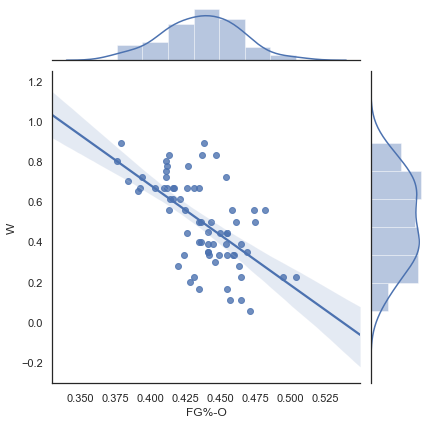

In [21]:
class Variable_relations():
    
    def __init__(self, dataset, independent_var, dependent_var, return_param=False):
        self.dataset = dataset
        self.independent_var = str(independent_var)
        self.dependent_var = str(dependent_var)
        self.return_param = return_param
    
    def find_coeff_ols(self):
        '''
        function is designed to take in user chosen dependent, independent variables.
        returns model output using ordinary least squares from the statsmodels api.
        If you only want to view coefficients and constants, change return_param to True. 
        '''
        model_simple = sm.OLS(self.dataset[self.dependent_var], self.dataset[self.independent_var]).fit()
        model = sm.OLS(self.dataset[self.dependent_var], sm.add_constant(self.dataset[self.independent_var])).fit()
        
        if self.return_param:
            return model.params
        
        return model.summary()
    
    def visuals(self):
        '''
        Takes in two variables(generally the independent and dependent), and plots a joint plot.
        Kind is set to regression
        '''
        plot = sns.jointplot(x=str(self.independent_var), y=str(self.dependent_var), data=self.dataset, kind='reg')

new = Variable_relations(data, 'FG%-O', 'W')
new.find_coeff_ols()
new.visuals()

In [15]:
# def find_coeff_ols(dataset, ind_var, dep_var='W', return_param=False):
#     '''
#     function is designed to take in user chosen dependent, independent variables.
#     returns model output using ordinary least squares from the statsmodels api.
#     If you only want to view coefficients and constants, change return_param to True. 
#     '''
#     model_simple = sm.OLS(dataset[dep_var], dataset[ind_var]).fit()
    
#     model = sm.OLS(dataset[dep_var], sm.add_constant(dataset[ind_var])).fit()  
    
#     if return_param:
#         return model.params
    
#     return model.summary()

# find_coeff_ols(data, ['FG%-T', 'FG%-O'], return_param=True)

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const    0.302728
FG%-T    4.446790
FG%-O   -3.995054
dtype: float64

In [13]:
# def visuals(dataset, desired_data1, desired_data2):
#     '''
#     Takes in two variables(generally the independent and dependent), and plots a joint plot.
#     Kind is set to regression
#     '''
#     plot = sns.jointplot(x=str(desired_data1), y=str(desired_data2), data=dataset, kind='reg')
        